# Segmentazione della clientela per una campagna di marketing di un'azienda di servizi finanziari

L'azienda di servizi finanziari per cui lavori sta investendo in una nuova campagna di marketing per per promuovere la propria linea di carte di credito.

Hai a disposizione un dataset contiene le seguenti informazioni su 9000 possessori di carte di credito dell'azienda:

 - CUST_ID : Identificazione del titolare della carta di credito (Categorico)
 - BALANCE : importo del saldo rimasto sul conto per effettuare acquisti
 - BALANCE_FREQUENCY : frequenza di aggiornamento del saldo, punteggio tra 0 e 1 (1 = aggiornato frequentemente, 0 = non aggiornato frequentemente).
 - PURCHASES : Quantità di acquisti effettuati dal conto
 - ONEOFF_PURCHASES : Importo massimo di acquisti effettuati in un'unica soluzione
 - INSTALLMENTS_PURCHASES : Importo degli acquisti effettuati a rate
 - CASH_ADVANCE : Anticipo in contanti dato dall'utente
 - PURCHASES_FREQUENCY : frequenza degli acquisti, punteggio tra 0 e 1 (1 = acquisti frequenti, 0 = acquisti non frequenti).
 - ONEOFFPURCHASESFREQUENCY : Quanto frequentemente gli acquisti vengono effettuati in un'unica soluzione (1 = acquisti frequenti, 0 = acquisti non frequenti).
 - PURCHASESINSTALLMENTSFREQUENCY : frequenza con cui vengono effettuati gli acquisti a rate (1 = frequentemente, 0 = non frequentemente).
 - CASHADVANCEFREQUENCY : frequenza con cui viene pagato l'anticipo in contanti
 - CASHADVANCETRX : Numero di transazioni effettuate con "contanti in anticipo".
 - PURCHASES_TRX : Numero di transazioni di acquisto effettuate
 - CREDIT_LIMIT : Limite della carta di credito dell'utente
 - PAYMENTS  : Importo dei pagamenti effettuati dall'utente
 - MINIMUM_PAYMENTS : Importo minimo dei pagamenti effettuati dall'utente
 - PRCFULLPAYMENT : Percentuale del pagamento completo pagato dall'utente
 - TENURE : Durata del servizio di carta di credito per l'utente

 Il tuo compito è quello di segmentare la clientela attuale indentificando dei cluster verso la quale l'azienda dovrà indirizzare apposite campagne di marketing.

### [Link al dataset](https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv)

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d

In [2]:
DATASET_URL = "https://proai-datasets.s3.eu-west-3.amazonaws.com/credit_card_customers.csv"
RANDOM_SEED=11
plt.rcParams['figure.figsize']=[12,6]

In [3]:
dataset=pd.read_csv(DATASET_URL)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df=dataset.copy()
df=df.drop('CUST_ID',axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [6]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [7]:
replace_with=df[df.columns].mean()
df=df.fillna(replace_with)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [8]:
def remove_outliers(column):
    z_scores = np.abs((column - column.mean()) / column.std())
    threshold = 3
    return column[z_scores <= threshold]
for column in df.columns:
  remove_outliers(df[column])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [9]:
ss=StandardScaler()
scaled_data = ss.fit_transform(df)
df_scaled = pd.DataFrame(scaled_data, columns=df.columns)
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


<Axes: >

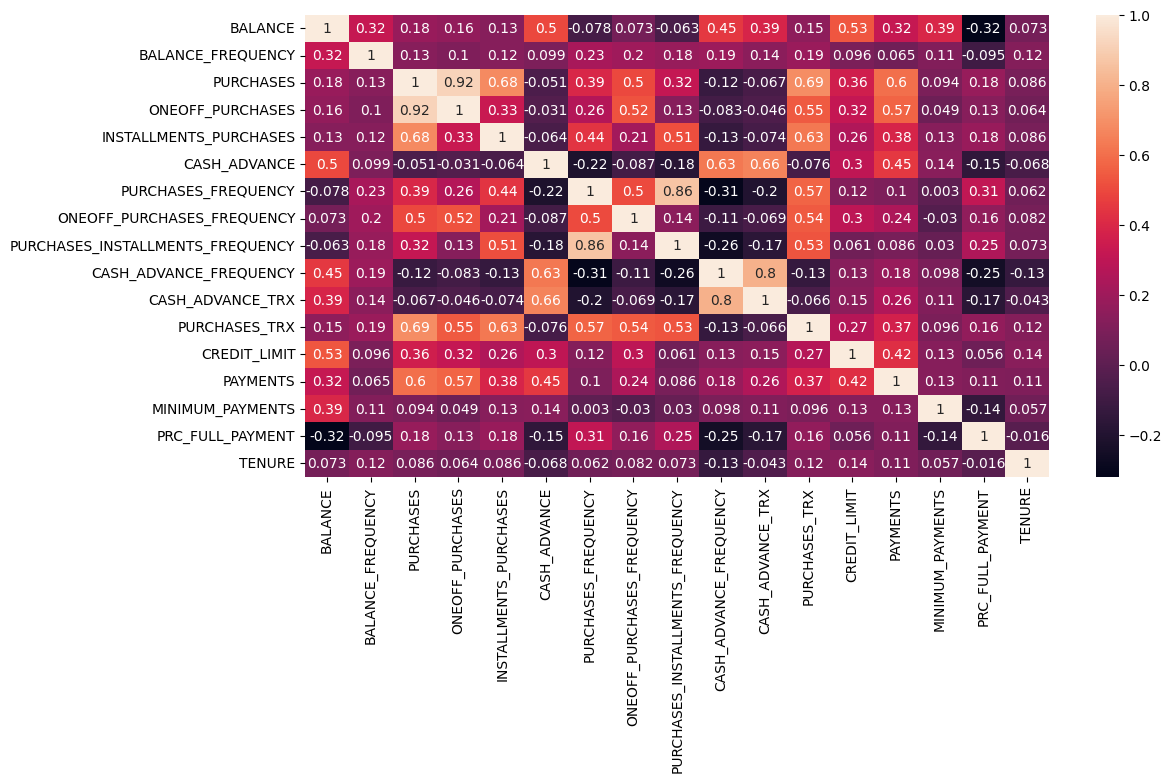

In [10]:
plt.figure()
sns.heatmap(df.corr(numeric_only=True),annot=True)

#Clustering con BALANCE e PURCHASES:

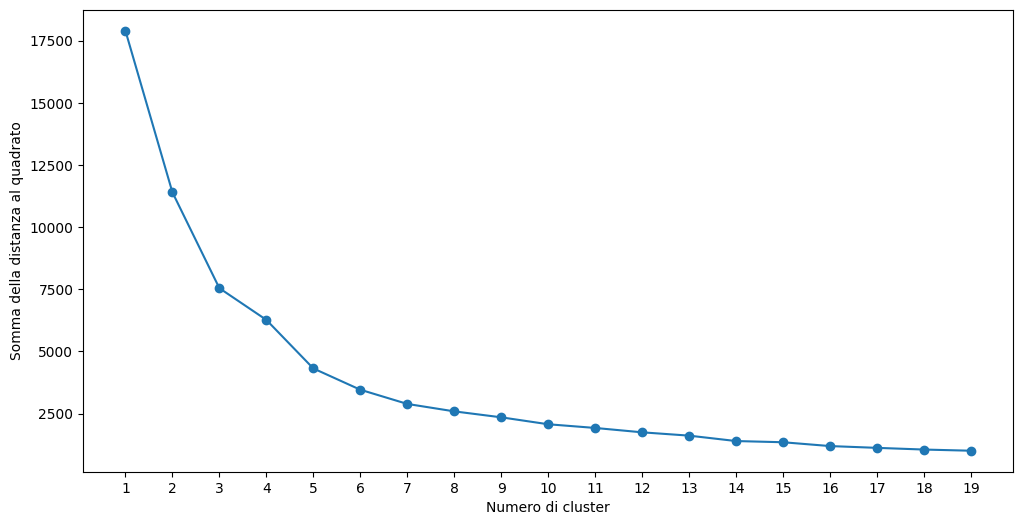

In [11]:
X=df_scaled[['BALANCE','PURCHASES']].values
def plot_ssd_curve(X,k_range=(1,20)):
  ssd={}
  for k in range(k_range[0],k_range[1]):
    kmeans=KMeans(n_clusters=k,init='k-means++',n_init='auto',random_state=RANDOM_SEED)
    kmeans.fit(X)
    ssd[k]=kmeans.inertia_
  plt.plot(list(ssd.keys()),list(ssd.values()),marker='o')
  plt.xlabel('Numero di cluster')
  plt.ylabel('Somma della distanza al quadrato')
  plt.xticks(range(k_range[0], k_range[1]))
  plt.show()
plot_ssd_curve(X)

In [12]:
kmeans=KMeans(n_clusters=5,init='k-means++',n_init='auto',random_state=RANDOM_SEED)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)
kmeans.inertia_

4317.959910891611

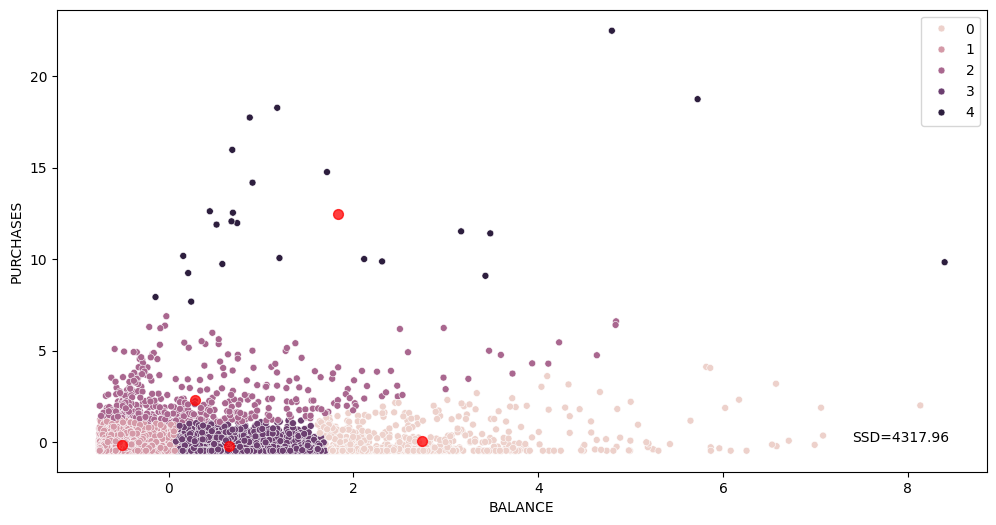

In [13]:
def plot_clusters(model,data,axlabels=None,print_ssd=False):
  centers=model.cluster_centers_
  cluster=model.predict(data)
  sns.scatterplot(x=data[:,0],y=data[:,1],hue=cluster,s=25)
  plt.scatter(centers[:,0],centers[:,1],c='red',alpha=0.75,s=50)
  if axlabels!=None:
    plt.xlabel(axlabels[0])
    plt.ylabel(axlabels[1])
  if print_ssd:
    plt.text(X[:,0].max()-1,0,f'SSD={model.inertia_:.2f}')
  plt.show()
plot_clusters(kmeans,X,axlabels=['BALANCE','PURCHASES'],print_ssd=True)

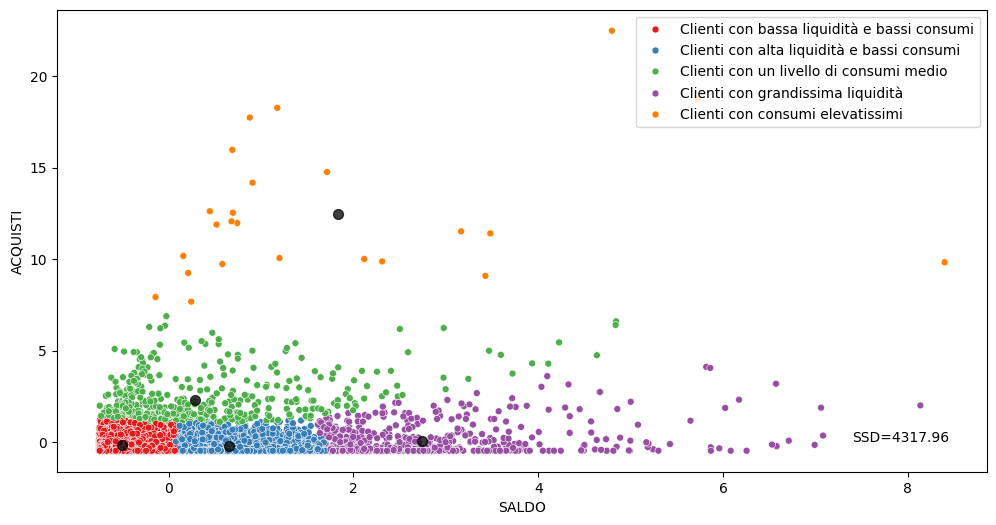

In [14]:
cluster_map={
      0:'Clienti con grandissima liquidità',
      1:'Clienti con bassa liquidità e bassi consumi',
      2:'Clienti con un livello di consumi medio',
      3:'Clienti con alta liquidità e bassi consumi',
      4:'Clienti con consumi elevatissimi'
}
def plot_clusters(model,data,axlabels=None,print_ssd=False):
  cluster=model.predict(data)
  vfunc=np.vectorize(lambda x:cluster_map[x])
  cluster=vfunc(cluster)
  centers = model.cluster_centers_
  centers=model.cluster_centers_
  sns.scatterplot(x=data[:,0],y=data[:,1],hue=cluster,s=25,palette='Set1')
  plt.scatter(centers[:,0],centers[:,1],c='black',alpha=0.75,s=50)
  if axlabels:
    plt.xlabel(axlabels[0])
    plt.ylabel(axlabels[1])
  if print_ssd:
    plt.text(X[:,0].max()-1,0,f'SSD={model.inertia_:.2f}')
  plt.legend(loc='upper right')
  plt.show()
plot_clusters(kmeans,X,axlabels=['SALDO','ACQUISTI'],print_ssd=True)

#Clustering con ONEOFF PURCHASES e INSTALLMENTS PURCHASES

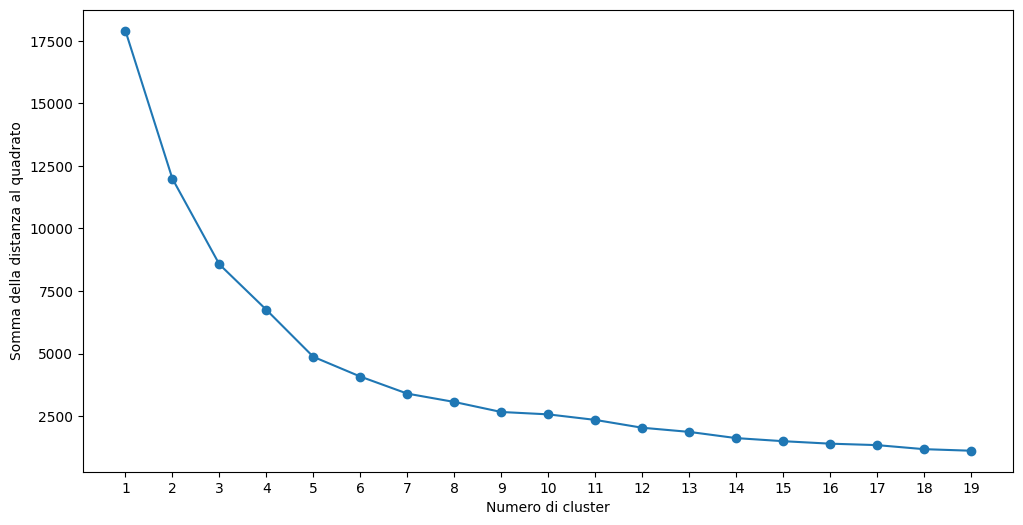

In [15]:
X=df_scaled[['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES']].values
def plot_ssd_curve(X,k_range=(1,20)):
  ssd={}
  for k in range(k_range[0],k_range[1]):
    kmeans=KMeans(n_clusters=k,init='k-means++',n_init='auto',random_state=RANDOM_SEED)
    kmeans.fit(X)
    ssd[k]=kmeans.inertia_
  plt.plot(list(ssd.keys()),list(ssd.values()),marker='o')
  plt.xlabel('Numero di cluster')
  plt.ylabel('Somma della distanza al quadrato')
  plt.xticks(range(k_range[0], k_range[1]))
  plt.show()
plot_ssd_curve(X)

In [16]:
kmeans=KMeans(n_clusters=5,init='k-means++',n_init='auto',random_state=RANDOM_SEED)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)
kmeans.inertia_

4871.472082958704

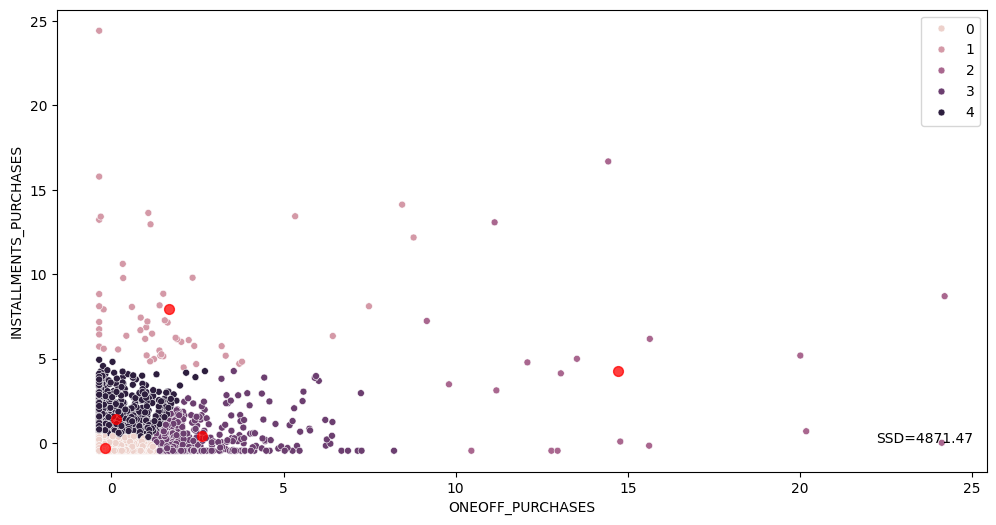

In [17]:
def plot_clusters(model,data,axlabels=None,print_ssd=False):
  centers=model.cluster_centers_
  cluster=model.predict(data)
  sns.scatterplot(x=data[:,0],y=data[:,1],hue=cluster,s=25)
  plt.scatter(centers[:,0],centers[:,1],c='red',alpha=0.75,s=50)
  if axlabels!=None:
    plt.xlabel(axlabels[0])
    plt.ylabel(axlabels[1])
  if print_ssd:
    plt.text(X[:,0].max()-2,0,f'SSD={model.inertia_:.2f}')
  plt.show()
plot_clusters(kmeans,X,axlabels=['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES'],print_ssd=True)

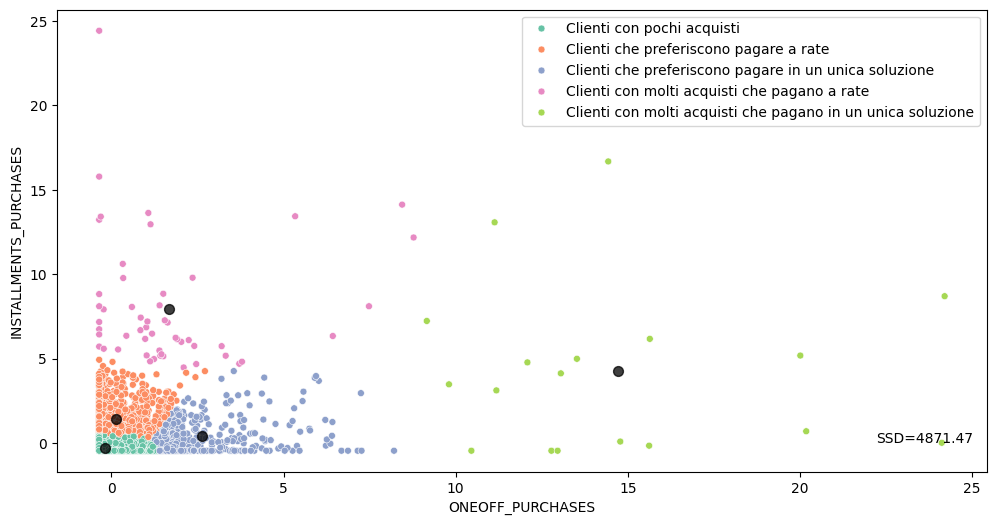

In [18]:
cluster_map={
      0:'Clienti con pochi acquisti',
      1:'Clienti con molti acquisti che pagano a rate',
      2:'Clienti con molti acquisti che pagano in un unica soluzione',
      3:'Clienti che preferiscono pagare in un unica soluzione',
      4:'Clienti che preferiscono pagare a rate'
}
def plot_clusters(model,data,axlabels=None,print_ssd=False):
  cluster=model.predict(data)
  vfunc=np.vectorize(lambda x:cluster_map[x])
  cluster=vfunc(cluster)
  centers=model.cluster_centers_
  sns.scatterplot(x=data[:,0],y=data[:,1],hue=cluster,s=25,palette='Set2')
  plt.scatter(centers[:,0],centers[:,1],c='black',alpha=0.75,s=50)
  if axlabels!=None:
    plt.xlabel(axlabels[0])
    plt.ylabel(axlabels[1])
  if print_ssd:
    plt.text(X[:,0].max()-2,0,f'SSD={model.inertia_:.2f}')
  plt.legend(loc='upper right')
  plt.show()
plot_clusters(kmeans,X,axlabels=['ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES'],print_ssd=True)

#Clustering con CASH ADVANCE e PAYMENTS

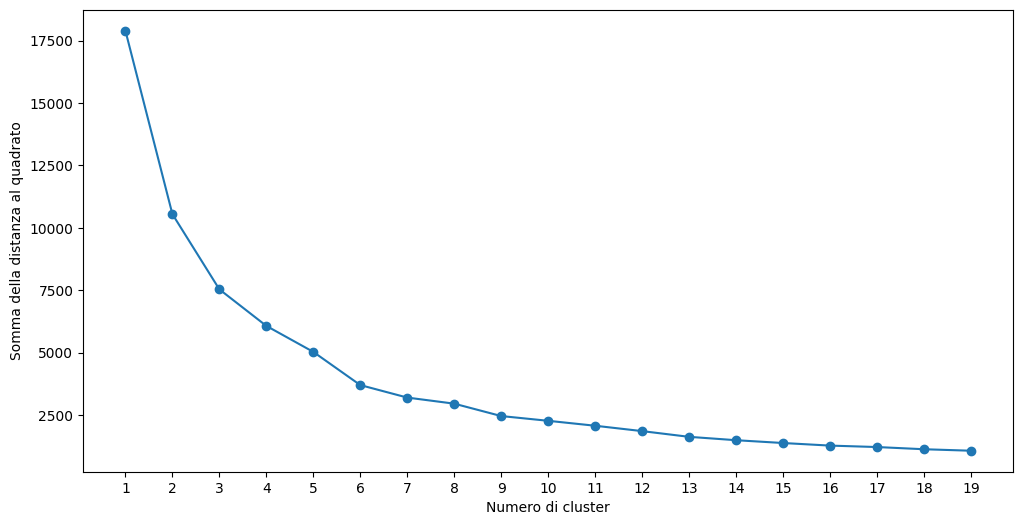

In [19]:
X=df_scaled[['CASH_ADVANCE','PAYMENTS']].values
def plot_ssd_curve(X,k_range=(1,20)):
  ssd={}
  for k in range(k_range[0],k_range[1]):
    kmeans=KMeans(n_clusters=k,init='k-means++',n_init='auto',random_state=RANDOM_SEED)
    kmeans.fit(X)
    ssd[k]=kmeans.inertia_
  plt.plot(list(ssd.keys()),list(ssd.values()),marker='o')
  plt.xlabel('Numero di cluster')
  plt.ylabel('Somma della distanza al quadrato')
  plt.xticks(range(k_range[0], k_range[1]))
  plt.show()
plot_ssd_curve(X)

In [20]:
kmeans=KMeans(n_clusters=6,init='k-means++',n_init='auto',random_state=RANDOM_SEED)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)
kmeans.inertia_

3695.306845389012

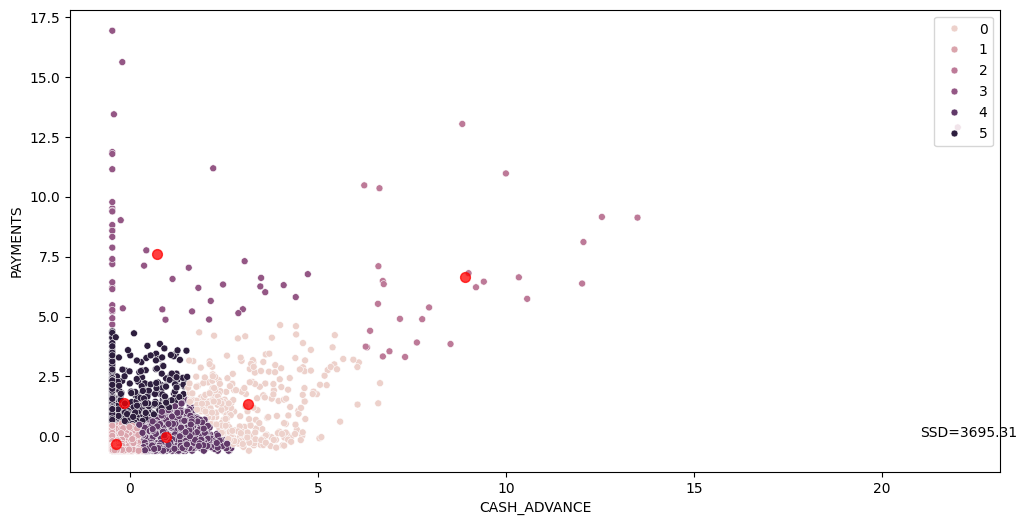

In [21]:
def plot_clusters(model,data,axlabels=None,print_ssd=False):
  centers=model.cluster_centers_
  cluster=model.predict(data)
  sns.scatterplot(x=data[:,0],y=data[:,1],hue=cluster,s=25)
  plt.scatter(centers[:,0],centers[:,1],c='red',alpha=0.75,s=50)
  if axlabels!=None:
    plt.xlabel(axlabels[0])
    plt.ylabel(axlabels[1])
  if print_ssd:
    plt.text(X[:,0].max()-1,0,f'SSD={model.inertia_:.2f}')
  plt.legend(loc='upper right')
  plt.show()
plot_clusters(kmeans,X,axlabels=['CASH_ADVANCE','PAYMENTS'],print_ssd=True)

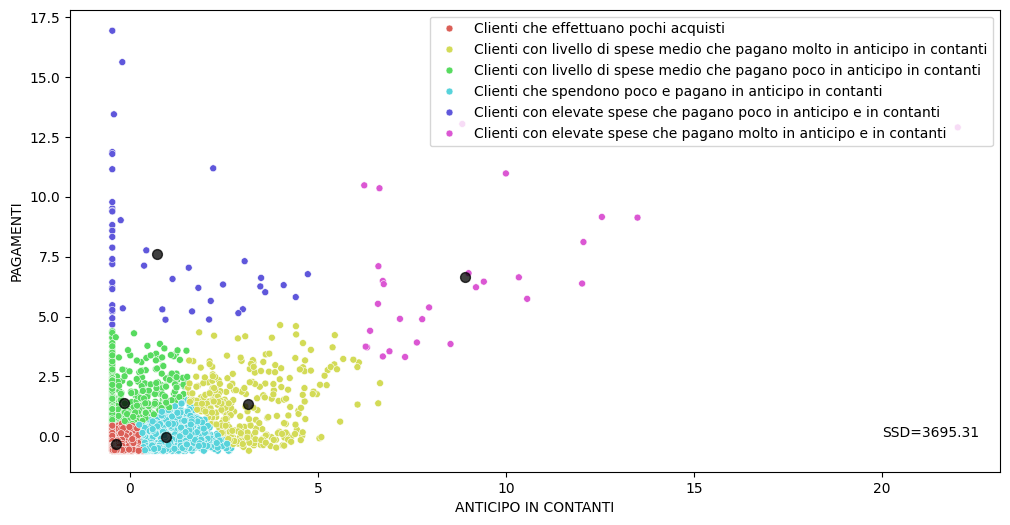

In [22]:
cluster_map={
      0:'Clienti con livello di spese medio che pagano molto in anticipo in contanti',
      1:'Clienti che effettuano pochi acquisti',
      2:'Clienti con elevate spese che pagano molto in anticipo e in contanti',
      3:'Clienti con elevate spese che pagano poco in anticipo e in contanti',
      4:'Clienti che spendono poco e pagano in anticipo in contanti',
      5:'Clienti con livello di spese medio che pagano poco in anticipo in contanti'
}
def plot_clusters(model,data,axlabels=None,print_ssd=False):
  cluster=model.predict(data)
  vfunc=np.vectorize(lambda x:cluster_map[x])
  cluster=vfunc(cluster)
  centers=model.cluster_centers_
  sns.scatterplot(x=data[:,0],y=data[:,1],hue=cluster,s=25,palette='hls')
  plt.scatter(centers[:,0],centers[:,1],c='black',alpha=0.75,s=50)
  if axlabels!=None:
    plt.xlabel(axlabels[0])
    plt.ylabel(axlabels[1])
  if print_ssd:
    plt.text(X[:,0].max()-2,0,f'SSD={model.inertia_:.2f}')
  plt.legend(loc='upper right')
  plt.show()
plot_clusters(kmeans,X,axlabels=['ANTICIPO IN CONTANTI','PAGAMENTI'],print_ssd=True)

#Clustering con CASH ADVANCE, PAYMENTS e CREDIT LIMIT

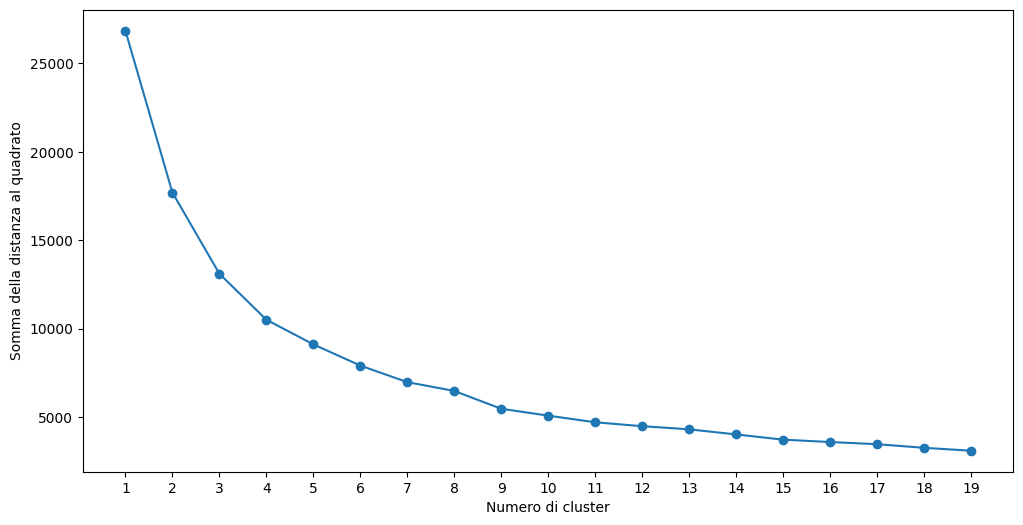

In [ ]:
X=df_scaled[['CASH_ADVANCE','PAYMENTS','CREDIT_LIMIT']].values
plot_ssd_curve(X)

In [ ]:
kmeans=KMeans(n_clusters=9,init='k-means++',n_init='auto',random_state=RANDOM_SEED)
kmeans.fit(X)
y_kmeans=kmeans.predict(X)
kmeans.inertia_

5472.576201512969

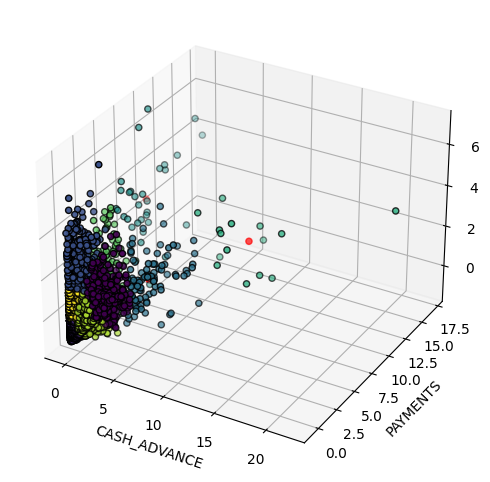

In [ ]:
def plot_clusters3d(model,data,axlabels=None):
  centers=kmeans.cluster_centers_
  cluster= model.predict(data)
  ax=plt.axes(projection='3d')
  ax.scatter3D(data[:,0],data[:,1],data[:,2],c=cluster,edgecolors='black')
  ax.scatter3D(centers[:,0],centers[:,1],centers[:,2],color='red')
  if axlabels is not None:
        ax.set_xlabel(axlabels[0])
        ax.set_ylabel(axlabels[1])
        ax.set_zlabel(axlabels[2])
plot_clusters3d(kmeans,X,axlabels=['CASH_ADVANCE','PAYMENTS','CREDIT_LIMIT'])

In [ ]:
import plotly.graph_objs as go

def plot_clusters3d(model, data, axlabels=None):
    centers = model.cluster_centers_
    cluster = model.predict(data)
    trace_data = go.Scatter3d(
        x=data[:, 0],
        y=data[:, 1],
        z=data[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=cluster,
            colorscale='Viridis',
            opacity=0.8,
            line=dict(color='black', width=0.5)
        ),
        name='Data Points'
    )
    trace_centers = go.Scatter3d(
        x=centers[:, 0],
        y=centers[:, 1],
        z=centers[:, 2],
        mode='markers',
        marker=dict(
            size=10,
            color='red',
            opacity=1,
            symbol='cross'
        ),
        name='Cluster Centers'
    )
    fig = go.Figure(data=[trace_data, trace_centers])
    if axlabels is not None:
        fig.update_layout(scene=dict(xaxis_title=axlabels[0],
                                      yaxis_title=axlabels[1],
                                      zaxis_title=axlabels[2]))
    fig.show()
plot_clusters3d(kmeans,X,axlabels=['CASH_ADVANCE','PAYMENTS','CREDIT_LIMIT'])